In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Already up to date.


# The Analysis Pipeline
At the core of programming for data science we have the following pipeline:


![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/pipeline.png)

# Import and Explore



## Example: The Tennis Dataset

### Import CSV Files
Perhaps the simplest data source is the Comma Separated Value (CSV) file:

```
outlook,temp,humidity,windy,play
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,mild,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,mild,high,false,no
sunny,cool,normal,false,yes
rainy,mild,normal,false,yes
sunny,mild,normal,true,yes
overcast,mild,high,true,yes
overcast,hot,normal,false,yes
rainy,mild,high,true,no
```
**Header row**, column names comma separated.
Then **one row for each observation**, attribute values are comma separated.

This is the 'tennis.csv' file.


Pandas has support for reading and writing CSV files...


In [2]:
import pandas

In [3]:
tennis_df = pandas.read_csv(home+"tennis.csv")

In [4]:
tennis_df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### More Detailed Analysis of the Dataframe

A quick peek at the first 5 rows of the frame

In [5]:
tennis_df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
tennis_df.shape

(14, 5)

In [7]:
tennis_df.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

All our attribute values are labels or in statistical jargon - our columns represent **categorical variables**.


In [8]:
tennis_df[['play']].value_counts()

play
yes     9
no      5
dtype: int64

'Yes' is the *majority* label so we would expect the mode to be 'yes'...

In [9]:
tennis_df[['play']].mode() # this should display 'yes' as the mode

,play
0,yes


### Basic Visualization

We will use the builtin functions for our visualization. These builtins are based on `matplotlib`.  In the tennis dataset all **variables are categorical** so we will use the `value_counts` function to compute the labels and then we plot the labels via **bar graphs**.

<Axes: xlabel='play'>

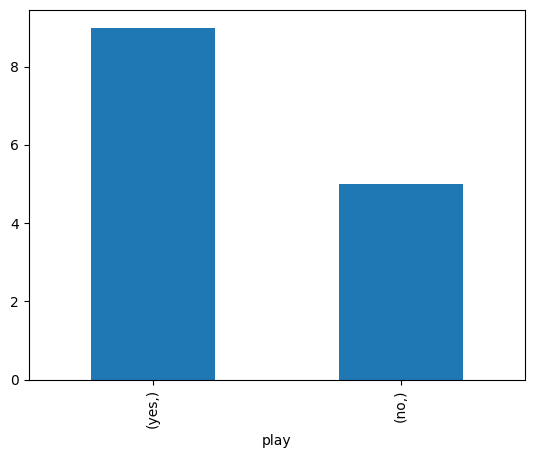

In [10]:
tennis_df[['play']].value_counts().plot.bar()

Let's try something fancy buy plotting all columns computationally.

In [11]:
col_names = list(tennis_df.columns)
col_names

['outlook', 'temp', 'humidity', 'windy', 'play']

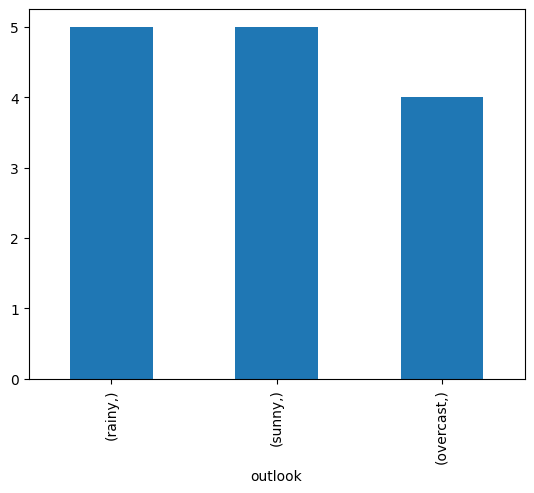

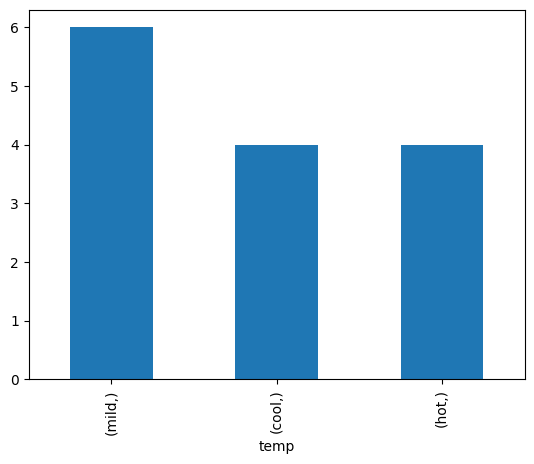

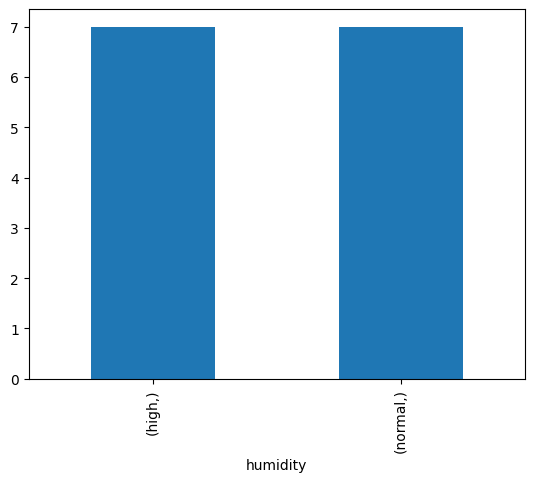

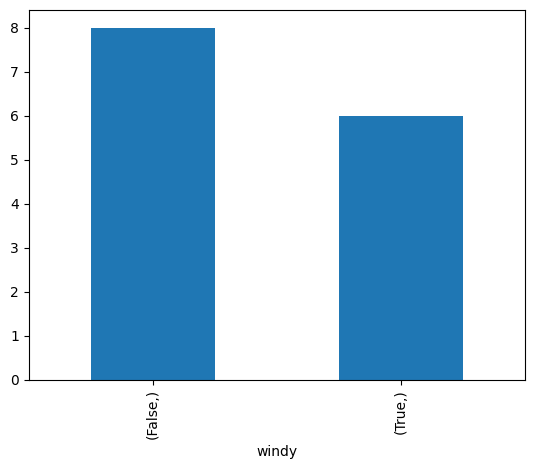

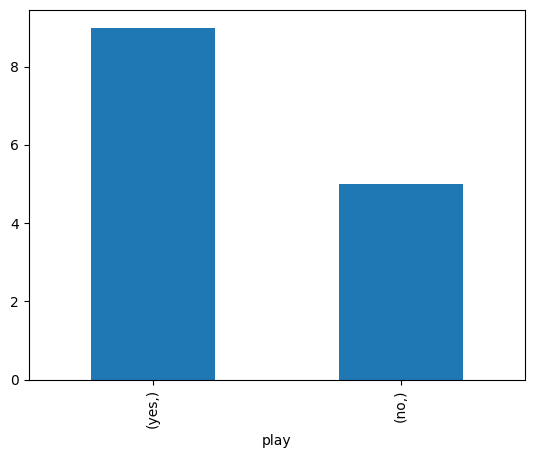

In [12]:
col_names = list(tennis_df.columns)
import matplotlib.pyplot as plot
for c in col_names:
    tennis_df[[c]].value_counts().plot.bar()
    plot.show() # we need this to force the display of a plot at each iteration

## Example: The Iris Data Set

Let’s try another data set that has a mix of categorical and numeric attributes:
* The *Iris* data set
* One of the most famous data sets in statistics/data science
* Describes three species of iris


### Import CSV File

In [13]:
iris_df = pandas.read_csv(home+'iris.csv')

In [14]:
iris_df.shape

(150, 6)

In [15]:
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


### More Detailed Dataframe Analysis

Check whether columns are numerical or categorical.

In [16]:
# get the variable names
col_names = list(iris_df.columns)

# check each variable
for c in col_names:
  if iris_df[c].dtype == 'int64':
    print("Column '{}' is numeric (int)".format(c))
  elif iris_df[c].dtype == 'float64':
    print("Column '{}' is numeric (float)".format(c))
  else:
    print("Column '{}' is categorical".format(c))


Column 'id' is numeric (int)
Column 'Sepal.Length' is numeric (float)
Column 'Sepal.Width' is numeric (float)
Column 'Petal.Length' is numeric (float)
Column 'Petal.Width' is numeric (float)
Column 'Species' is categorical


We have a mix of numeric and categorical attributes, get some descriptive statistics.


In [17]:
iris_df.describe()  # only deals with numerical variables!

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Basic Visualization

We saw in our detailed analysis that the dataset has mostly numeric variables but also has one categorical variable: 'Species'



Let's plot the categorical variable via a bar graph.

<Axes: xlabel='Species'>

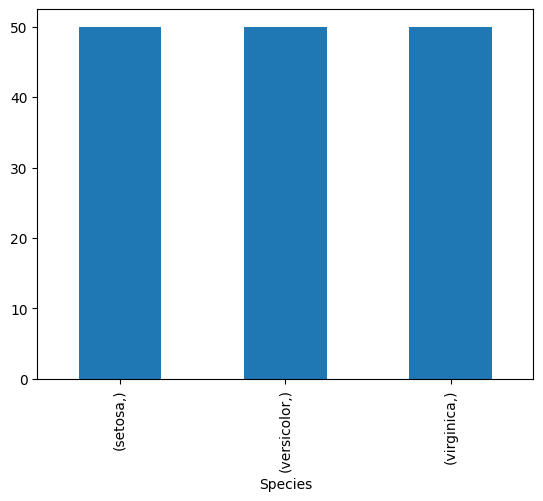

In [18]:
iris_df[['Species']].value_counts().plot.bar()

**Observation**: The three labels of this categorical variable appear an equal number of times.

With numerical variables it is customary to plot them with **historgrams** which give us an insight of **how values are distributed**.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>, <Axes: >]], dtype=object)

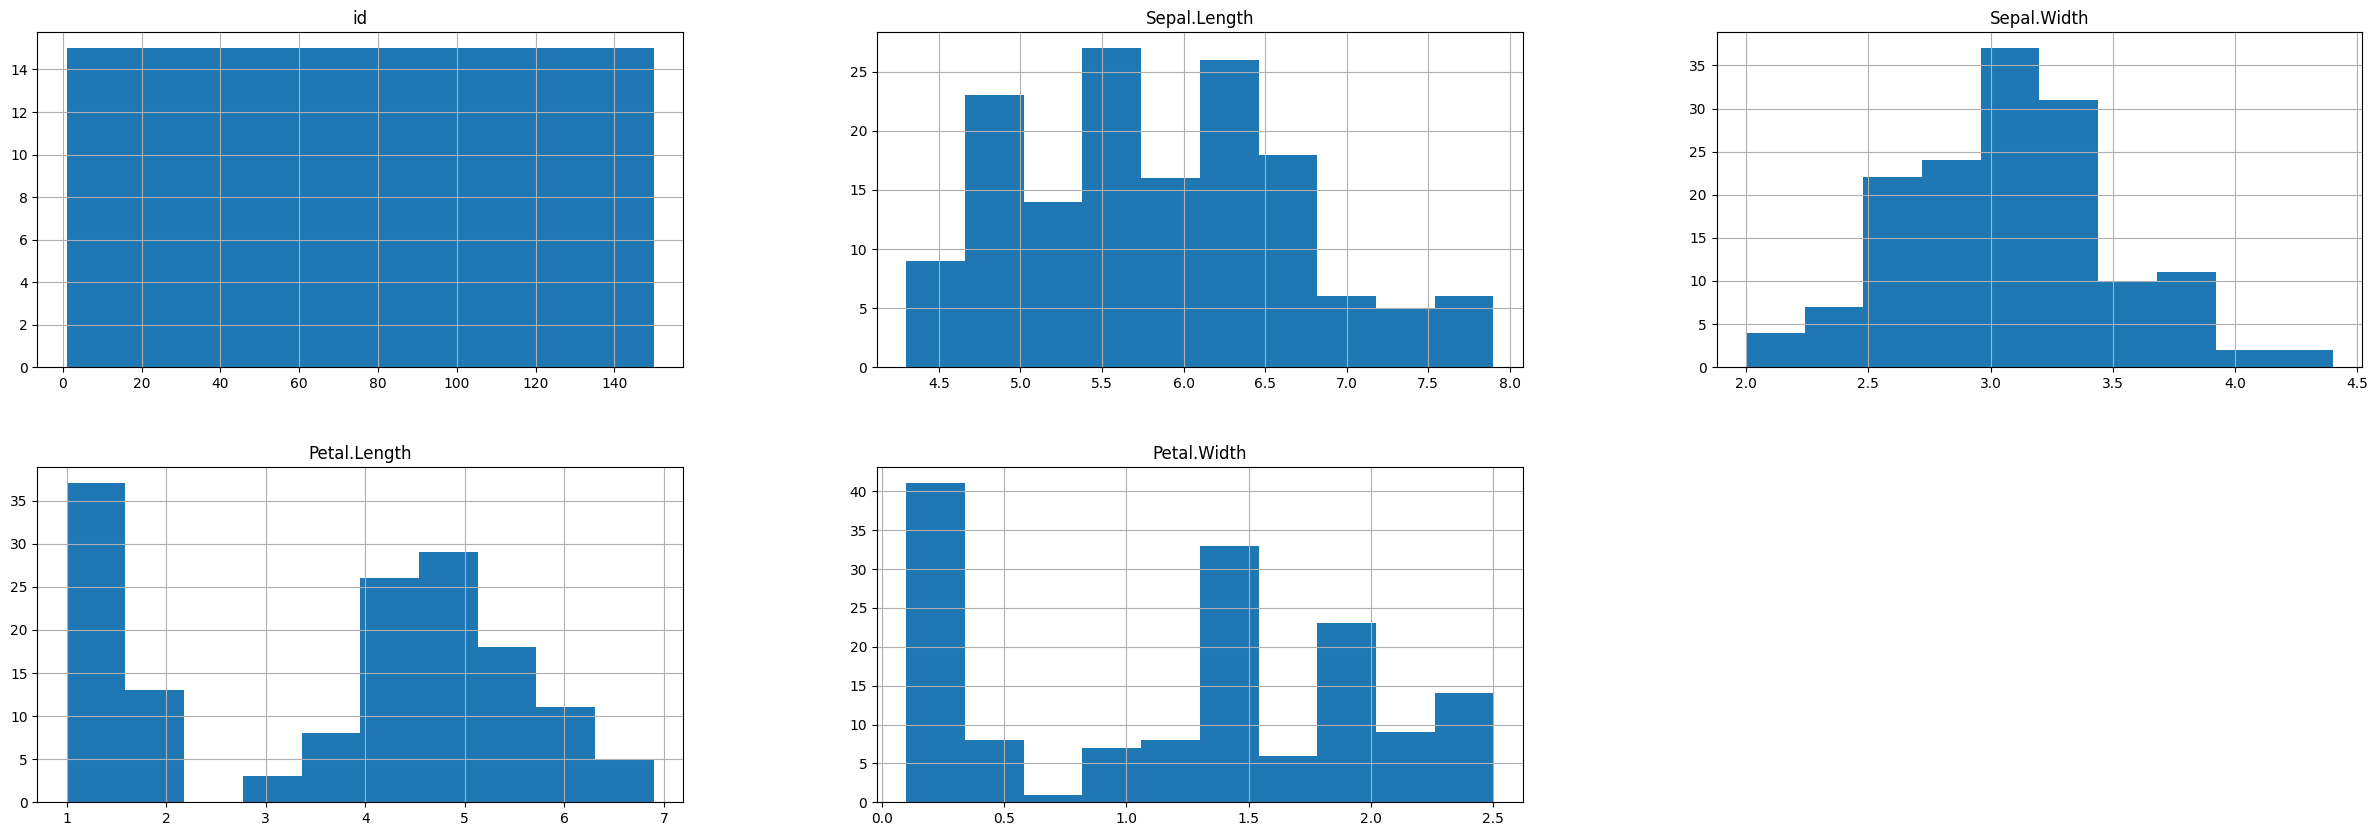

In [19]:
# hist only applies to numerical columns and ignore categorical variables
iris_df.hist(figsize=(30,10), layout=(2,3)) # figsize=(width,height) layout = (rows,cols)

**Observations**:

1. The 'id' variables is **uniformly** distributed.

1. The 'Sepal.Width' variable has a **normal distribution** and is **unimodal**

1. The remaining variables are **multimodal** distribution.

### Distributions

Distributions tell us how values behave within a particular variable.  In **unimodal** distributions (distributions with one peak) the peak of the distribution often represents the mean or average of the values.

<img src="https://www.statology.org/wp-content/uploads/2021/02/multimodal3.png" height="300" width="400">

The values of the y-axis tell us the likelihood of a particular value occuring in a dataset.

**Multimodal** distributions have more than one peak.  The are often the result of multiple distributions occuring within a single variable.  

Consider the scores of students in a a class. There is a distribution of grades of students who did study and then there is a distribution of students who did not study. Both distributions occuring in the same variable each giving rise to a different peak.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/bimodal-distribution-2.png" height="350" width="400">

(source: http://www.statisticshowto.com/multimodal-distribution/)

# Transform

Trans
![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/pipeline.png)

* The `id` column in the iris dataset does not add any information, it has a **uniform** distribution.
* It assigns a unique number to each row of the table.
* We want to just drop this column from our dataset


<Axes: ylabel='Frequency'>

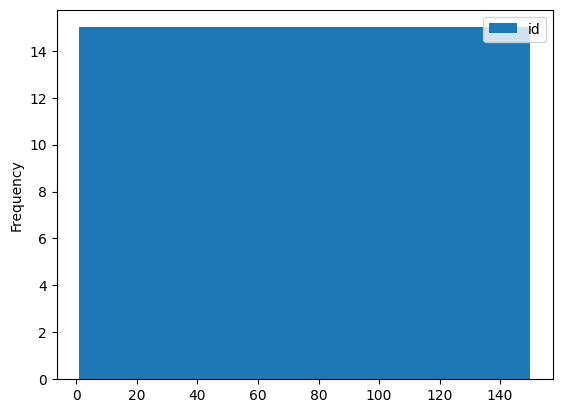

In [20]:
iris_df[['id']].plot.hist()

We use the drop function to drop the ‘id’ column.


In [21]:
iris_df.shape

(150, 6)

In [22]:
iris_new_df = iris_df.drop(columns=['id'])

In [23]:
iris_new_df.shape

(150, 5)

In [24]:
iris_new_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Looking at the *independent* variables.

array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

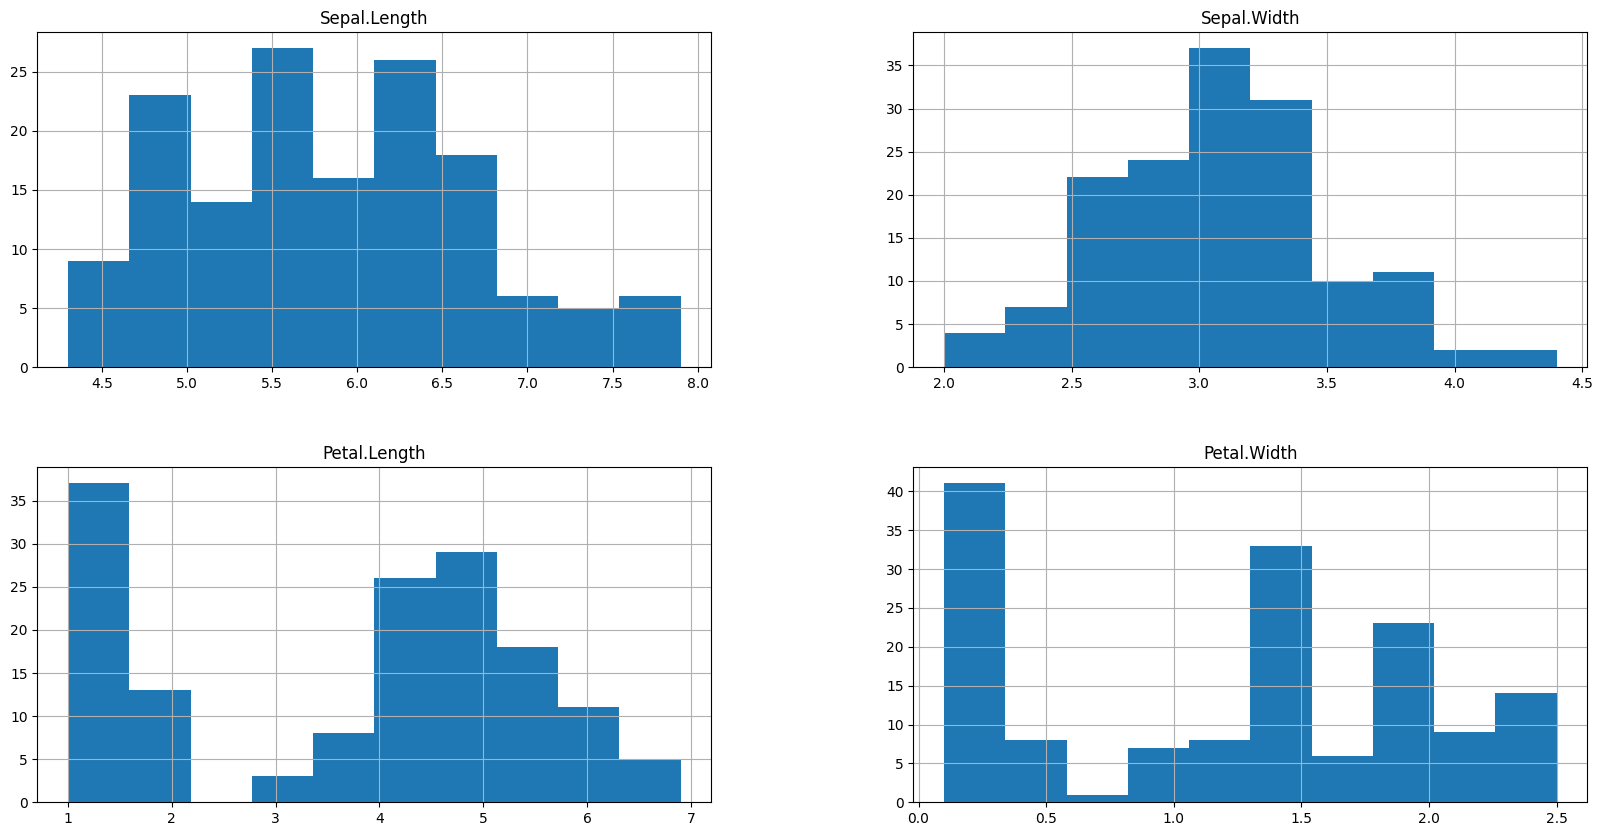

In [25]:
iris_new_df.hist(figsize=(20,10), layout=(2,2))

# Reading

* [2.1 Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)
* [3.0 Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
* [3.1 Introducing Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
* [4.0 Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [4.2 Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)


# Project

See Brightspace Assignment #1.

